# Good Vibrations

In [1]:
import sys
sys.path.append('../ThinkDsp')
import thinkdsp
import thinkplot

import matplotlib.pyplot as plt
import numpy as np

## Notes of the first 5 harmonics

In [2]:
frequency = 220

wave = thinkdsp.sin_wave(frequency, 1)
for h in range(2,6):
    harmonic_frequency = h * frequency
    waveh = thinkdsp.sin_wave(harmonic_frequency, 1)
    wave = wave | waveh 

wave.normalize()
wave.make_audio()

## Adjusting the notes of harmonics 

In [3]:
frequency = 220
octave_frequency = 2 * frequency

wave = thinkdsp.sin_wave(frequency, 1)
for h in range(2,6):
    harmonic_frequency = h * frequency
    while harmonic_frequency > octave_frequency:
        harmonic_frequency = harmonic_frequency / 2
    waveh = thinkdsp.sin_wave(harmonic_frequency, 1)
    wave = wave | waveh 

wave.normalize()
wave.make_audio()

## Function to make sounds

In [4]:
def makeTwoNotes(f1, ratio):
    f2 = ratio * f1
    wave = thinkdsp.sin_wave(f1, 1)
    wave = wave | thinkdsp.sin_wave(f2, 1)
    wave.normalize()
    return wave
 

## Octave (2:1)

In [5]:
wave = makeTwoNotes(220, 2/1)
wave.make_audio()

## Fifth (3:2)

In [6]:
wave = makeTwoNotes(220, 3/2)
wave.make_audio()

## Fourth (4:3)

In [7]:
wave = makeTwoNotes(220, 4/3)
wave.make_audio()

## Whole Tone / Second (9:8)

In [8]:
wave = makeTwoNotes(220, 9/8)
wave.make_audio()

## Major Third (5:4)

In [9]:
wave = makeTwoNotes(220, 5/4)
wave.make_audio()

## Minor Third (6:5)

In [10]:
wave = makeTwoNotes(220, 6/5)
wave.make_audio()

## Harmonic Series

In [11]:
frequency = 261.63

wave = thinkdsp.sin_wave(frequency, 0.5)
for h in range(2,17):
    harmonic_frequency = h * frequency
    waveh = thinkdsp.sin_wave(harmonic_frequency, 0.5)
    wave = wave | waveh 

wave.normalize()
wave.make_audio()

## Spectrum of guitar

In [12]:
wave = thinkdsp.read_wave('A4_guitar.wav')
wave.make_audio()

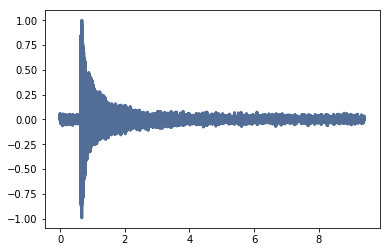

In [13]:
wave.plot()

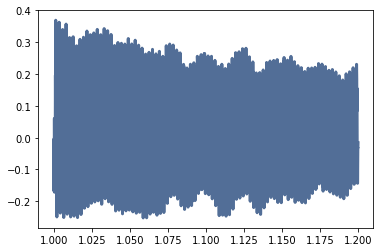

In [14]:
segment = wave.segment(start=1, duration=0.2)
segment.plot()

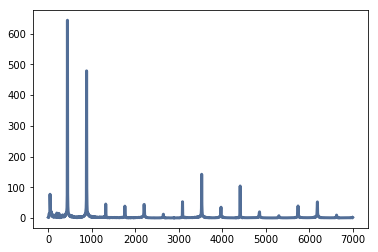

In [15]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

## Spectrum of handbell

In [16]:
wave = thinkdsp.read_wave('A4_handbell.wav')
wave.make_audio()

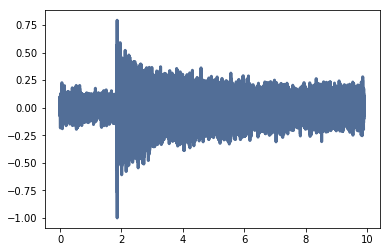

In [17]:
wave.plot()

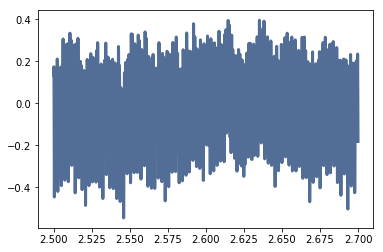

In [18]:
segment = wave.segment(start=2.5, duration=0.2)
segment.plot()

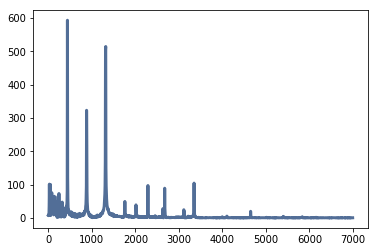

In [19]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

## Not exact 1:1

In [20]:
def makeTwoSoundJointly(f1, ratio):
    f2 = ratio * f1
    wave = thinkdsp.sin_wave(f1, 2)
    wave = wave + thinkdsp.sin_wave(f2, 2)
    wave.normalize()
    return wave

In [21]:
frequency = 220
wave = makeTwoSoundJointly(frequency, 1.1)
wave.make_audio()

## Exact 2:1

In [22]:
frequency = 220
wave = makeTwoSoundJointly(frequency, 2)
wave.make_audio()

## Not exact 2:1

In [23]:
frequency = 220
wave = makeTwoSoundJointly(frequency, 2.1)
wave.make_audio()

## Major scale in just intonation

In [35]:
frequency = 261.63   # C4
scale = [1, 9/8, 5/4, 4/3, 3/2, 5/3, 15/8, 2]

wave = thinkdsp.rest(0)
for i in range(8):
    fw = frequency * scale[i]
    ww = thinkdsp.sin_wave(fw, 1)
    wave = wave | ww

wave.normalize()
wave.make_audio()

## Chords in just intonation

C - Dm - Em - F - G - Am - Bm

In [46]:
scale = [1, 9/8, 5/4, 4/3, 3/2, 5/3, 15/8, 2, 2*9/8, 2*5/4, 2*4/3, 2*3/2, 2*5/3, 2*15/8, 2*2]

wave = thinkdsp.rest(0)
for i in range(8):
    ww = thinkdsp.sin_wave(frequency, 1)
    ww.scale(0)
    for j in range(3):
        ww = ww + thinkdsp.sin_wave(frequency*scale[i+j*2], 1)
    wave = wave | thinkdsp.rest(0.05)
    wave = wave | ww

wave.make_audio()
#wave.segment(start=2.5, duration=0.05).plot()

## All notes in just intonation

In [37]:
frequency = 261.63   # C4
scale = [1, 16/15, 9/8, 6/5, 5/4, 4/3, 45/32, 3/2, 8/5, 5/3, 9/5, 15/8, 2]

wave = thinkdsp.rest(0)
for i in range(12):
    fw = frequency * scale[i]
    ww = thinkdsp.sin_wave(fw, 1)
    wave = wave | ww

wave.normalize()
wave.make_audio()